In [40]:
import import_ipynb
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utilities.UtilityFunctions import vectorize, results_conf_matrix, retrieve_processed_reviews_df, model_metrics

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
df = retrieve_processed_reviews_df()

Concatenating ../processed_data/processed_data-2.csv
Concatenating ../processed_data/processed_data-3.csv
Concatenating ../processed_data/processed_data-1.csv
Concatenating ../processed_data/processed_data-4.csv
Concatenating ../processed_data/processed_data-5.csv


In [4]:
df.head()

,Id,Score,Summary,Text,Sentiment,Clean_text
0,127777,5,Most enjoyable....and irresistible,I ordered these to serve at a 'proper Scottish...,1,i serve proper scottish tea church i doubled t...
1,127778,5,You won't even think your eating healthy....,I'm normally a very healthy yet picky eater. ...,1,im normally healthy yet picky eater these soy ...
2,127779,5,The best of all the cheese soy chips,I tested most of the cheddar soy chips availab...,1,i tested cheddar soy chips available online on...
3,127780,5,Low Fat and Few Calories (HEALTHY SNACK); Grea...,Glenny's Low Fat Soy Crisps are a healthy snac...,1,glennys low fat soy crisps healthy snack i abs...
4,127781,2,overcooked,Glennys organic soy crisps have always been my...,-1,glennys organic soy crisps always favorite bra...


In [5]:
X = df['Clean_text']
y = df['Sentiment']

In [6]:
df['Sentiment'].value_counts()

 1    363122
 0    123293
-1     82012
Name: Sentiment, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

In [41]:
X_train_counts, X_train_tfidf = vectorize(X_train)

### Linear Support Vector Classification
#### sklearn.svm.LinearSVC uses one-vs-rest for multiclass

In [14]:
pipe_svm = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
            ('clf', LinearSVC(random_state=42, max_iter=1000))])

In [15]:
parameters = {'clf__C': [0.01, 0.1, 1]}

In [16]:
grid = GridSearchCV(pipe_svm, param_grid=parameters, cv=3, n_jobs=-1)

In [17]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', LinearSVC(random_state=42))]),
             n_jobs=-1, param_grid={'clf__C': [0.01, 0.1, 1]})

In [18]:
predictedSVM_grid = grid.predict(X_test)
np.mean(predictedSVM_grid == y_test)

0.8180778635891842

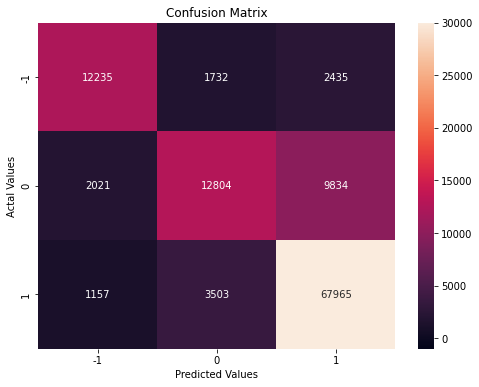

In [42]:
svm_conf = results_conf_matrix(y_test, predictedSVM_grid)

In [76]:
# accuracy_score, precision_score, recall_score, f1_score
model_metrics(y_test, predictedSVM_grid)


Accuracy: 0.811

Micro Precision: 0.811
Micro Recall: 0.811
Micro F1-score: 0.811

Macro Precision: 0.772
Macro Recall: 0.722
Macro F1-score: 0.741

Weighted Precision: 0.801
Weighted Recall: 0.811
Weighted F1-score: 0.801

Classification Report

              precision    recall  f1-score   support

          -1       0.79      0.74      0.76     16402
           0       0.69      0.49      0.58     24659
           1       0.84      0.93      0.89     72625

    accuracy                           0.81    113686
   macro avg       0.77      0.72      0.74    113686
weighted avg       0.80      0.81      0.80    113686

